<a href="https://colab.research.google.com/github/JuanDaGue/MachineLearning/blob/main/rent10k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from numpy import math
from scipy.optimize import curve_fit
import seaborn as sns
from scipy import stats
from scipy.stats import *
import pandas as pd
from scipy.optimize import curve_fit
from scipy.optimize import minimize
#import emcee
import seaborn as sns
import pandas as pd
#import corner
#import pymc3 as pm

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving apartments_for_rent_classified_10K.csv to apartments_for_rent_classified_10K.csv


In [ ]:
df = pd.read_csv('apartments_for_rent_classified_10K.csv',
                  sep=";", encoding='cp1252')

In [ ]:
df2=df.drop(['id'], axis=1)
df2

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,None,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,None,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,None,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,None,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,None,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,None,...,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,None,...,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,None,...,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,NaN,...,"$4,790",Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,1577362186


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['bathrooms'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['bedrooms'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['price'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['square_feet'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['bathrooms'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['bedrooms'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['price'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['square_feet'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df2, *['category'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df2, *['has_photo'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df2, *['pets_allowed'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df2, *['price_type'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df2, *[[['bathrooms', 'bedrooms'], ['bedrooms', 'price'], ['price', 'square_feet'], ['square_feet', 'latitude']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df2, *['category', 'has_photo'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df2, *['has_photo', 'pets_allowed'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df2, *['pets_allowed', 'price_type'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df2, *['bathrooms', 'category'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df2, *['bathrooms', 'has_photo'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df2, *['bathrooms', 'pets_allowed'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df2, *['bathrooms', 'price_type'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df2, *['time', 'bathrooms', 'category'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df2, *['time', 'bathrooms', 'has_photo'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df2, *['time', 'bathrooms', 'pets_allowed'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df2, *['time', 'bathrooms', 'price_type'], **{})
chart

ERROR:root:Did not find quickchart key chart-509d4ceb-e65f-4b26-a3fc-20361659df9d in chart cache
ERROR:root:Did not find quickchart key chart-509d4ceb-e65f-4b26-a3fc-20361659df9d in chart cache
ERROR:root:Did not find quickchart key chart-509d4ceb-e65f-4b26-a3fc-20361659df9d in chart cache


#2 punto

## El data frame
El data frame contiene descripciones de diferentes apartamentos en alquiler en varias ubicaciones de Estados Unidos. Cada entrada parece incluir información sobre la ubicación, las comodidades, el precio mensual del alquiler, el número de habitaciones y baños, y otros detalles relevantes sobre los apartamentos

# **2.** Realice la limpieza y exploración de los datos. Cuál es el nivel de calidad de los datos? Cómo se distribuyen las variables en los datos? Existen valores atípicos o valores faltantes en los datos? Existen relaciones o patrones interesantes entre las variables?
Nota: En este punto haga gráficos y estadísticos descriptivos adecuados a cada tipo de variable.

**RP:** los datos en el dataset son de buena calidad, ya que de ellos podemos estraer informacion relevante para el analisis de los datos, algunas datos como Son El precio, los metros cuadrados, el numero de habitacione. etc, Algunos de las colimna de datos tienen valores nulos (null o nan ) como es el caso de de algunas direccioes algunas direecciones vacios, apartamentos sin mascota, etc.


In [ ]:
#datos relevantes
Variables=np.array(['square_feet','bathrooms','bedrooms','price'])
def Statistic (var):
  for i in range(len(var)):
    print(var[i])
    media = df[var[i]].mean()
    mediana = df[var[i]].median()
    moda = df[var[i]].mode()
    rango= np.array([df[var[i]].min(),df[var[i]].max()])
    print("""
        Media: %d
        Mediana: %d
        Moda: %d
    """ % (media,mediana,moda))
    print("""
        rango:"""," - ".join(map(str, rango)))
    print('\n')
Statistic (Variables)

square_feet

        Media: 945
        Mediana: 802
        Moda: 700
    

        rango: 101 - 40000


bathrooms

        Media: 1
        Mediana: 1
        Moda: 1
    

        rango: 1.0 - 8.5


bedrooms

        Media: 1
        Mediana: 2
        Moda: 1
    

        rango: 0.0 - 9.0


price

        Media: 1486
        Mediana: 1270
        Moda: 1350
    

        rango: 200 - 52500




### Distribución de Variables en los Datos

Los datos proporcionados describen diferentes apartamentos en alquiler y contienen información sobre diversas variables. A continuación, te mostraré cómo se distribuyen algunas de las variables clave en estos datos:

1. **Precio de Alquiler Mensual:**
   - El rango de precios mensuales de alquiler varía desde $\$200$ hasta $\$52,500$.

2. **Número de Habitaciones:**
   - Los apartamentos tienen entre $0$ y $9$ dormitorios.

3. **Número de Baños:**
   - La cantidad de baños varía, con algunos apartamentos teniendo $1$ baño y otros teniendo $8.5$ baños.

4. **Ubicaciones:**
   - Los apartamentos se encuentran en diferentes ubicaciones, como Akron (Ohio), Beachwood (Ohio), Seffner (Florida), Dallas (Texas), Crofton (Maryland), Denver (Colorado), Hackensack (Nueva Jersey), Arlington (Texas), y Los Ángeles (California). etc

5. **Mascotas Permitidas:**
   - Algunos apartamentos permiten mascotas, como gatos y perros, con restricciones en cuanto a razas y número de mascotas.

6. **Inclusión de Servicios Públicos:**
   - Algunos apartamentos incluyen servicios públicos en el precio del alquiler, excepto electricidad.

7. **Coordenadas Geográficas:**
   - Se proporcionan coordenadas geográficas (latitud y longitud) para cada ubicación de apartamento.

8. **Fuente de Listado:**
   - Los datos incluyen la fuente del listado, como RentDigs.com, RENTCafé y RentLingo.




##Datacleaning

**¿Existen relaciones o patrones interesantes entre las variables?**



La relacion mas importante que hemos visto entre los datos se da entre el Area del apartamento (metros cuadrados) y el precio al cual este se esta arrendando, se puede obserbvar una tendencia  lineal, ya que al aumentar el area del inmueble , tambien aumenta al precio,
hay otros factores que influyen en el precio de arrendamiento, ya sea el tipo de inmueble(apto o casa), la cantidad de alcobas o de baños que este posee
Para esto nos vamos a observar estos comprtamientos nos vamos a servir de las siguientes graficas.
Veamos primero las  que consideramos mas importante  

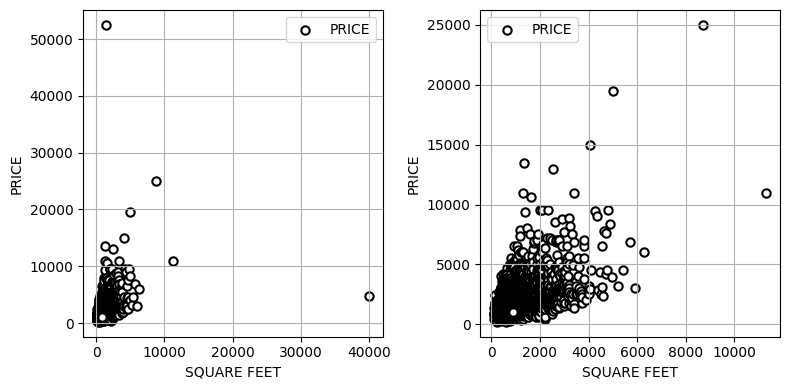

In [ ]:
df2=df2.loc[df2.price < 30000, :]
df2=df2.loc[df2.square_feet < 15000, :]
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))
for i, ax in enumerate(axes.flat, start=0):

    if(i==1):
      ax.scatter(df2['square_feet'],df2['price'],c = "white",
           edgecolors = "black", linewidths = 1.5, label="PRICE")
    else:
      ax.scatter(df['square_feet'],df['price'], c = "white",
           edgecolors = "black", linewidths = 1.5, label="PRICE")
    ax.set_xlabel('SQUARE FEET' )
    ax.set_ylabel('PRICE')
    ax.grid()
    ax.legend()
fig.tight_layout()

plt.show()

En La grafica de la derecha se eliminaron algunos valores que estan muy alejados de la media, y que enotorpecen el analisis que se esta haciendo sobre la relacion entre el precio y los pies cuadrados de los arriendos.


Hagamos unsa pequeñas graficas donde se observe las variables que influyen en el precio de los arriendos

In [ ]:
import numpy as np
from google.colab import autoviz
import matplotlib.pyplot as plt

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8, colors=None):
    plt.figure(figsize=(len(colname_pairs) * 4 * figscale, 4 * figscale))
    if colors is None:
        # Si no se proporciona una lista de colores, utiliza colores predeterminados
        colors = ['blue', 'red', 'purple', 'orange', 'cyan', 'magenta']

    for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
        ax = plt.subplot(1, len(colname_pairs), plot_i)
        color = colors[plot_i - 1]  # Obtén el color correspondiente al índice de la gráfica
        df.plot(kind='scatter', x=x_colname, y=y_colname, s=(37 * figscale), alpha=alpha, ax=ax,  c = "white",
           edgecolors = color)
        ax.spines[['top', 'right',]].set_visible(False)
        ax.grid()

    plt.tight_layout()
    return autoviz.MplChart.from_current_mpl_state()

# Lista de colores personalizados para cada gráfica de dispersión
custom_colors = ['purple',  'black', 'black', 'purple']

chart = scatter_plots(df2, *[[['bathrooms', 'bedrooms'], ['bedrooms', 'price'], ['price', 'square_feet'], ['bathrooms', 'price']]], colors=custom_colors)
chart


De las graficas anteriores podemos corroborar que el, cuanto mas incrementa el numero de habitaciones y de baños, tambien incremente al valor del arriendo, se puede ver que ya para mas de 4 habitaciones el valor puede superar los $15.000$ *USD*, al igual que para la cantidad de baños disponibles,

## Histogramas

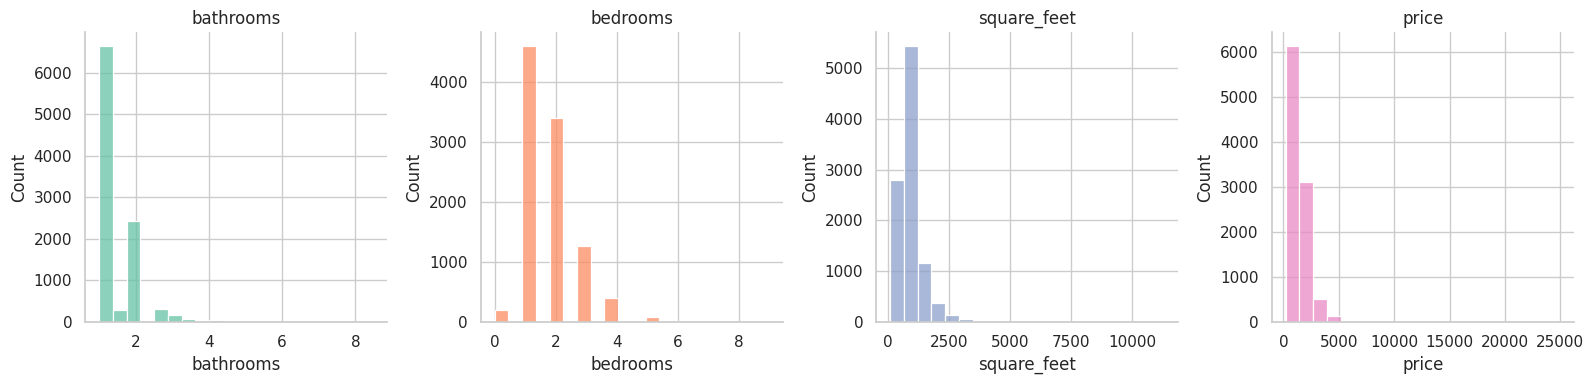

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Importamos Seaborn para paletas de colores

def histogram(df, colnames, num_bins=20, figscale=1):
    # Creamos una paleta de colores personalizada
    custom_palette = sns.color_palette("Set2", len(colnames))

    # Creamos una figura para los histogramas
    plt.figure(figsize=(len(colnames) * 4 * figscale, 4 * figscale))

    for plot_i, colname in enumerate(colnames, start=1):
        # Creamos un subplot para cada columna
        plt.subplot(1, len(colnames), plot_i)
        sns.histplot(df2[colname], bins=num_bins, color=custom_palette[plot_i - 1])
        plt.title(colname)  # Agregamos un título al subplot
        plt.gca().spines[['top', 'right']].set_visible(False)

    # Ajustamos el diseño de los subplots
    plt.tight_layout()

# df2 es el dataframe del cual recortamos los precios y las Areas atipicas
colnames = ['bathrooms', 'bedrooms', 'square_feet', 'price']

# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")

histogram(df2, colnames)
plt.show()


Si eliminamos los valores atipicos de los Histogrtamas optemos lo siguiente,
- **Primer cuartil (Q1):** El primer cuartil (Q1) es el valor que separa el 25% inferior de los datos del 75% superior. Es el valor que se encuentra en el lugar donde el 25% de los datos están por debajo y el 75% están por encima.

- **Tercer cuartil (Q3):** El tercer cuartil (Q3) es el valor que separa el 75% inferior de los datos del 25% superior. Es el valor que se encuentra en el lugar donde el 75% de los datos están por debajo y el 25% están por encima.

- **Rango Intercuartil (IQR):** El Rango Intercuartil (IQR) se calcula como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1): IQR = Q3 - Q1. El IQR es una medida de la dispersión que se basa en la distribución de los datos en el rango intercuartil y se utiliza comúnmente para identificar valores atípicos en un conjunto de datos.
Una vez se eliminen estos valores optenemos lo siguiente.

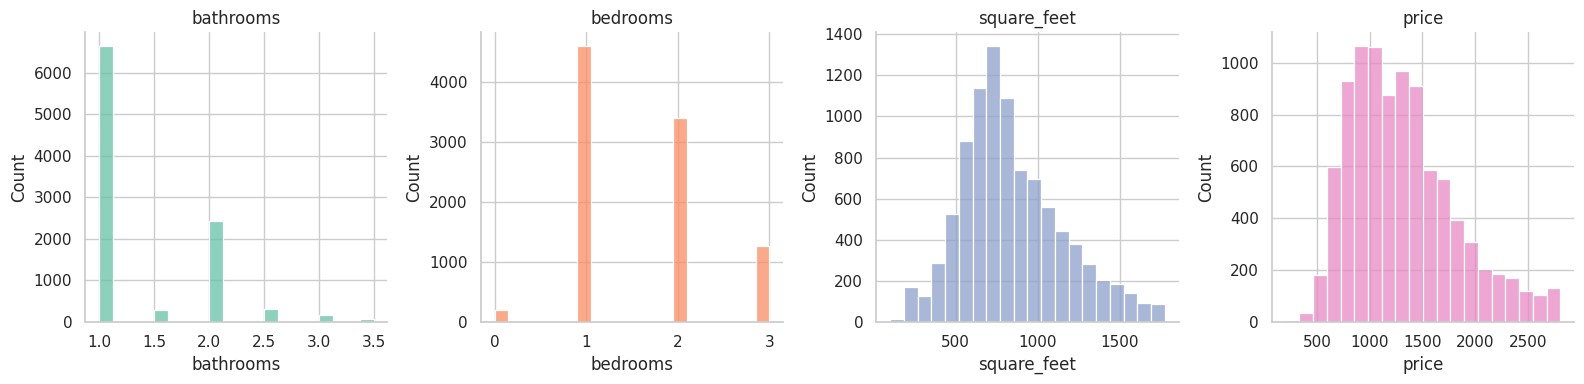

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df2 es el dataframe del cual recortamos los precios y las Areas atipicas
colnames = ['bathrooms', 'bedrooms', 'square_feet', 'price']

# Calcular el rango intercuartil (IQR) para cada columna
Q1 = df2[colnames].quantile(0.25)
Q3 = df2[colnames].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los valores atípicos
df2_clean = df2[(df2[colnames] >= lower_bound) & (df2[colnames] <= upper_bound)]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear histogramas con los datos limpios
def histogram(df, colnames, num_bins=20, figscale=1):
    custom_palette = sns.color_palette("Set2", len(colnames))
    plt.figure(figsize=(len(colnames) * 4 * figscale, 4 * figscale))

    for plot_i, colname in enumerate(colnames, start=1):
        plt.subplot(1, len(colnames), plot_i)
        sns.histplot(df[colname], bins=num_bins, color=custom_palette[plot_i - 1])
        plt.title(colname)
        plt.gca().spines[['top', 'right']].set_visible(False)

    plt.tight_layout()

histogram(df2_clean, colnames)
plt.show()


Las gráficas de histogramas permiten visualizar la distribución de datos en diferentes variables, como baños, dormitorios, superficie en pies cuadrados y precios en un conjunto de propiedades. A través de estas representaciones gráficas, se pueden extraer diversas conclusiones:

1. **Baños y dormitorios:** Los histogramas revelan la frecuencia de propiedades con diferentes cantidades de baños y dormitorios, lo que proporciona información sobre las preferencias del mercado inmobiliario.

2. **Superficie en pies cuadrados:** La distribución de áreas de las propiedades se muestra, ayudando a entender el tamaño predominante de las mismas.

3. **Precios:** Los histogramas de precios desglosan la gama de valores en el conjunto de datos, facilitando la comprensión de la asequibilidad y segmentación del mercado.

4. **Outliers:** Estas gráficas pueden identificar valores atípicos, que son observaciones inusuales en los datos.

Estos graficos nos ayudas a identificar patrones, tendencias y valores atípicos importantes pueden ser útiles para la toma de decisiones en el ámbito inmobiliario, como la fijación de precios, la segmentación de mercado o la comprensión de las preferencias de los clientes.


**Otros datos que no son de poca utilidad**




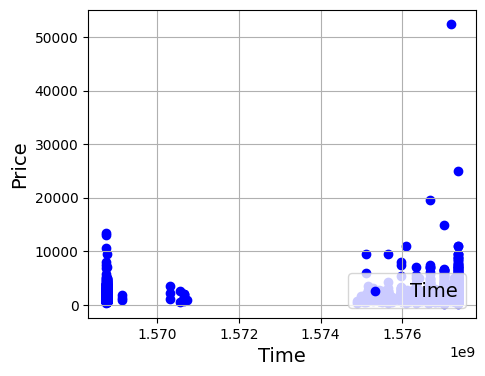

In [ ]:
# Representacion grafica de dos dimensiones del conjunto de datos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 4))

plt.scatter(df['time'],df['price'], c="b", label="Time")

plt.xlabel("Time", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.grid()
plt.show()

3**
Para los datos anteriores, se va a proponer un modelo lineal

1. **Modelos de Regresión Propuestos**:
   
   a) **Modelo de Regresión Lineal Inicial**: El primer modelo de regresión propuesto incluyó las variables "baños", "habitaciones", "permite_mascotas" y "metros_cuadrados" como predictores del precio. Este modelo se creó inicialmente.

   b) **Modelo de Regresión Lineal Depurado**: Luego, se eliminaron las observaciones en las que el número de habitaciones era mayor que 4, ya que se consideró que esas observaciones no aportaban al modelo. Se creó un segundo modelo de regresión lineal con las variables restantes.

   c) **Modelo de Regresión Logarítmica**: Se creó un tercer modelo de regresión lineal utilizando el logaritmo natural del precio como variable dependiente y las mismas variables independientes que en el modelo depurado.

   d) **Modelo de Regresión Gamma**: Se ajustó un modelo de regresión generalizada (GLM) con una distribución Gamma y enlace logarítmico para el precio. Se utilizaron las mismas variables independientes que en el modelo de regresión lineal depurado.

2. **Criterios Estadísticos para Evaluar la Calidad del Ajuste**:

   - Para evaluar la calidad del ajuste de los modelos de regresión lineal inicial y depurado, se utilizó el resumen del modelo (`summary(modelo_regresion)`), que proporciona información sobre los coeficientes, estadísticas de ajuste y p-values.
   
   - Para el modelo de regresión logarítmica, se examinaron los resultados del resumen del modelo y se realizaron pruebas de independencia Durbin-Watson, homocedasticidad Breusch-Pagan y normalidad Shapiro-Wilk en los residuales.

   - Para el modelo de regresión Gamma, se utilizó el resumen del modelo y se realizaron pruebas de colinealidad, independencia Durbin-Watson, homocedasticidad Breusch-Pagan y ajuste de normalidad Shapiro-Wilk en los residuales.

3. **Hipótesis Estadísticas Asociadas con Cada Modelo Propuesto**:

   - Para los modelos de regresión lineal, las hipótesis incluyen la relación lineal entre las variables predictoras y la variable dependiente, la independencia de los residuales y la normalidad de los residuales.

   - Para el modelo de regresión logarítmica, las hipótesis son similares a las de los modelos lineales, pero se asume que la relación es logarítmica.

   - Para el modelo de regresión Gamma, las hipótesis incluyen la relación entre las variables predictoras y la variable de respuesta siguiendo una distribución Gamma y un enlace logarítmico.

4. **Comparación de los Modelos Propuestos**:

   - La comparación de los modelos se basa en la calidad del ajuste, la significancia estadística de los coeficientes, la independencia y homocedasticidad de los residuales, y la normalidad de los residuales.

   - Se pueden comparar los modelos utilizando estadísticas como el R-cuadrado ajustado, las pruebas de bondad de ajuste (como el estadístico de Durbin-Watson y el de Breusch-Pagan) y las pruebas de normalidad en los residuales.

   - El modelo que mejor se ajuste a los datos y cumpla con las asunciones estadísticas podría considerarse como el modelo preferido.

Es importante destacar que la selección del modelo final dependerá de tus objetivos de análisis, las asunciones del modelo y la interpretación de los resultados. Se deben tener en cuenta todas estas consideraciones al seleccionar el modelo adecuado para tu estudio.

4**
Los resultados de un modelo lineal proporcionan información sobre cómo las variables predictoras están relacionadas con la variable de respuesta y qué tan bien se ajusta el modelo a los datos. Aquí tienes una interpretación de los resultados clave de tu modelo:

Coeficientes de las variables predictoras:

Los coeficientes estimados para las variables predictoras representan la magnitud y dirección de su influencia en la variable de respuesta (precio). Un coeficiente positivo indica un aumento en el precio a medida que aumenta la variable predictora, y un coeficiente negativo indica una disminución en el precio.

Por ejemplo, el coeficiente "banos1.5" de 136.48 significa que, manteniendo todas las demás variables constantes, un apartamento con 1.5 baños tiene un precio estimado que es $136.48 más alto que un apartamento con 1 baño.

El coeficiente "metros_cuadrados" de 0.6397 indica que, manteniendo todas las demás variables constantes, un aumento de 1 metro cuadrado en el tamaño del apartamento se asocia con un aumento de $0.6397 en el precio.

Estadísticas de significancia:

La columna "t value" muestra la estadística t para cada coeficiente, que mide cuántas veces es mayor el coeficiente estimado que su error estándar. Cuanto mayor sea el valor absoluto de t, más significativa es la relación entre la variable predictora y la variable de respuesta.

El valor "Pr(>|t|)" es el p-valor asociado al coeficiente. Un p-valor bajo (generalmente <0.05) indica que la variable predictora es estadísticamente significativa para predecir el precio.

Coeficiente de determinación (R-cuadrado):

El valor "Multiple R-squared" (R-cuadrado múltiple) es una medida de cuánta variabilidad en la variable de respuesta (precio) es explicada por el modelo. En tu caso, el R-cuadrado es 0.231, lo que significa que el 23.1% de la variabilidad en el precio se explica por las variables predictoras incluidas en el modelo.

El "Adjusted R-squared" (R-cuadrado ajustado) tiene en cuenta el número de variables en el modelo y ajusta el R-cuadrado por complejidad. En este caso, es similar al R-cuadrado múltiple.

F-statistic:

El valor F-statistic y su p-valor asociado (p-value) se utilizan para evaluar la globalidad de la significancia del modelo en su conjunto. Un valor de F-statistic alto y un p-value bajo indican que al menos una de las variables predictoras es significativa para predecir el precio.
En resumen, tu modelo muestra que las variables predictoras (número de baños, número de habitaciones y metros cuadrados) son estadísticamente significativas para predecir el precio de los apartamentos. Sin embargo, el R-cuadrado de 0.231 sugiere que estas variables no explican completamente la variabilidad en el precio, y puede haber otras variables no incluidas en el modelo que también son importantes.


**Modelo Lineal:**
- R-cuadrado (R²): 0.231
- Ajustado R-cuadrado: 0.23
- Residual standard error: 730.3

**Modelo Logarítmico:**
- R-cuadrado (R²): 0.2371
- Ajustado R-cuadrado: 0.2361
- Residual standard error: 0.4006

**Diferencias y Comparación:**

1. **Forma Funcional de los Modelos:**
   - El modelo lineal asume una relación lineal entre las variables predictoras y la variable de respuesta. En otras palabras, predice el precio como una combinación lineal de las variables predictoras.

   - El modelo logarítmico asume una relación logarítmica entre las variables predictoras y la variable de respuesta. En este caso, se utiliza el logaritmo natural del precio como la variable de respuesta y se predice como una combinación lineal de las variables predictoras.

2. **R² y Ajuste del Modelo:**
   - Ambos modelos tienen valores de R-cuadrado similares (alrededor del 23%), lo que indica que explican una cantidad similar de variabilidad en el precio.

   - El modelo logarítmico tiene un ligero R-cuadrado ajustado más alto, lo que sugiere que podría ser ligeramente mejor en términos de ajuste del modelo después de tener en cuenta el número de variables predictoras.

3. **Error Residual:**
   - El modelo lineal tiene un error residual mucho mayor (730.3) en comparación con el modelo logarítmico (0.4006). Esto significa que el modelo logarítmico tiene un mejor ajuste a los datos y produce errores de predicción más pequeños.

4. **Interpretación de Coeficientes:**
   - La interpretación de los coeficientes es diferente entre los dos modelos debido a la transformación logarítmica. En el modelo logarítmico, los coeficientes se asocian con cambios porcentuales en la variable de respuesta.

5. **Elección del Modelo:**
   - La elección entre el modelo lineal y el modelo logarítmico depende de los objetivos del análisis y la interpretación deseada. Si estás interesado en una interpretación lineal directa de las variables predictoras, el modelo lineal puede ser más apropiado. Por otro lado, si buscas un mejor ajuste a los datos y estás dispuesto a interpretar los coeficientes en términos de cambios porcentuales, el modelo logarítmico podría ser preferible.

6. **Consideraciones:**
   - Es importante tener en cuenta que, aunque el modelo logarítmico parece tener un mejor ajuste, la elección del modelo no debe basarse únicamente en métricas estadísticas. También debes considerar el contexto y la interpretación práctica de los resultados.


In [ ]:

# Leer el archivo CSV en un DataFrame
Apartamentos_para_renta = pd.read_csv('apartments_for_rent_classified_10K.csv',
                  sep=";", encoding='cp1252')

# Seleccionar las columnas relevantes
Apartamentos_para_renta = Apartamentos_para_renta[['bathrooms', 'bedrooms', 'pets_allowed', 'price', 'square_feet', 'cityname', 'state']]

# Renombrar las columnas
Apartamentos_para_renta.columns = ['banos', 'habitaciones', 'permite_mascotas', 'precio', 'metros_cuadrados', 'ciudad', 'estado']

# Eliminar filas con valores nulos
Apartamentos_para_renta = Apartamentos_para_renta.dropna()

# Convertir la columna 'permite_mascotas' en un factor categórico
Apartamentos_para_renta['permite_mascotas'] = pd.Categorical(Apartamentos_para_renta['permite_mascotas'])

# Visualizar los datos
print(Apartamentos_para_renta.head())




    banos  habitaciones permite_mascotas  precio  metros_cuadrados  \
2     1.0           0.0             None    1390               107   
3     1.0           0.0             None     925               116   
8     1.0           0.0             None    1495               138   
14    1.0           0.0             None    1695               190   
15    1.0           1.0        Cats,Dogs    1560               200   

           ciudad estado  
2       Arlington     VA  
3         Seattle     WA  
8   San Francisco     CA  
14  San Francisco     CA  
15       New Bern     NC  


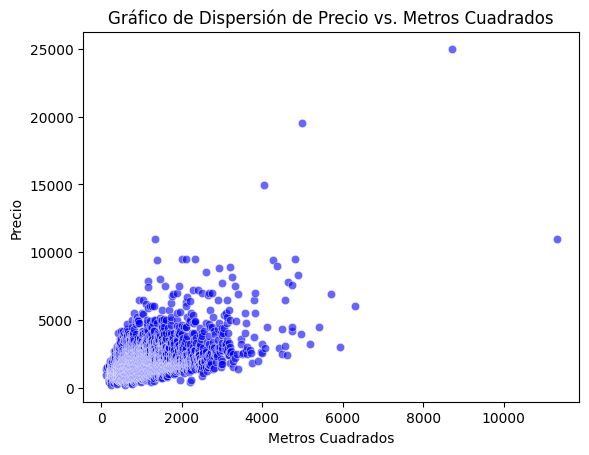

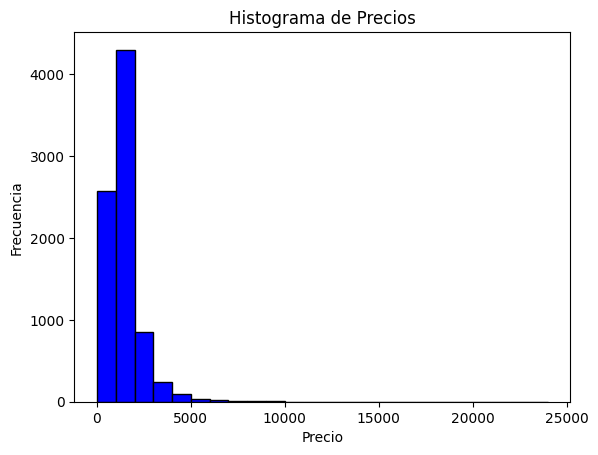

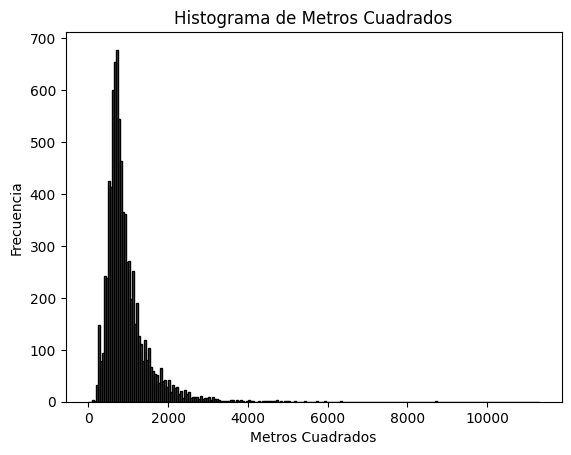

In [ ]:
# Crear un gráfico de dispersión
sns.scatterplot(data=Apartamentos_para_renta, x='metros_cuadrados', y='precio', color='blue', alpha=0.6)
plt.xlabel('Metros Cuadrados')
plt.ylabel('Precio')
plt.title('Gráfico de Dispersión de Precio vs. Metros Cuadrados')
plt.show()

# Histograma para la variable 'precio'
plt.hist(Apartamentos_para_renta['precio'], bins=range(0, int(max(Apartamentos_para_renta['precio'])), 1000), color='blue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')
plt.show()

# Histograma para la variable 'metros cuadrados'
plt.hist(Apartamentos_para_renta['metros_cuadrados'], bins=range(0, int(max(Apartamentos_para_renta['metros_cuadrados'])), 50), color='green', edgecolor='black')
plt.xlabel('Metros Cuadrados')
plt.ylabel('Frecuencia')
plt.title('Histograma de Metros Cuadrados')
plt.show()


In [ ]:
# Estadísticas descriptivas
Variables = ['metros_cuadrados', 'banos', 'habitaciones', 'precio']
var = ['metros_cuadrados', 'banos', 'habitaciones', 'precio']
for i in range(len(Variables)):
    print(var[i])
    media = np.mean(Apartamentos_para_renta[var[i]])
    mediana = np.median(Apartamentos_para_renta[var[i]])
    #moda = stats.mode(Apartamentos_para_renta[var[i]]).mode[0]
    rango = (np.min(Apartamentos_para_renta[var[i]]), np.max(Apartamentos_para_renta[var[i]]))
    print(f"Media: {media}")
    print(f"Mediana: {mediana}")
    #print(f"Moda: {moda}")
    print(f"Rango: {rango[0]} - {rango[1]}\n")

# Crear un modelo de regresión lineal
import statsmodels.api as sm

X = Apartamentos_para_renta[['banos', 'habitaciones', 'permite_mascotas', 'metros_cuadrados']]
y = Apartamentos_para_renta['precio']

X = sm.add_constant(X)  # Agregar una constante (intercepto)
modelo_regresion = sm.OLS(y, X).fit()

# Resumen del modelo
print(modelo_regresion.summary())

# Eliminar las filas con habitaciones > 4
Apartamentos_para_renta = Apartamentos_para_renta[Apartamentos_para_renta['habitaciones'] <= 4]

# Crear un nuevo modelo de regresión lineal
X = Apartamentos_para_renta[['banos', 'habitaciones', 'metros_cuadrados']]
y = Apartamentos_para_renta['precio']

X = sm.add_constant(X)  # Agregar una constante (intercepto)
modelo_regresion = sm.OLS(y, X).fit()

# Resumen del nuevo modelo
print(modelo_regresion.summary())

# Gráfico de diagnóstico para el modelo de regresión
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sm.graphics.qqplot(modelo_regresion.resid, dist=stats.norm, line='45', fit=True, ax=axes[0, 0])
axes[0, 0].set_title


metros_cuadrados
Media: 943.1215136994717
Mediana: 789.0
Rango: 107 - 11318

banos
Media: 1.3721587418601793
Mediana: 1.0
Rango: 1.0 - 8.5

habitaciones
Media: 1.7561125445386412
Mediana: 2.0
Rango: 0.0 - 9.0

precio
Media: 1469.9603145349552
Mediana: 1250.0
Rango: 200 - 25000



ValueError: ignored

##Costo de la renta por Estado

| Prueba                        | Estadística de Prueba | Grados de Libertad | Valor p    | Hipótesis Alternativa               |
|-------------------------------|-----------------------|-------------------|------------|-------------------------------------|
| Test de Independencia Durbin-Watson | 1.4574                | NA                | < 2.2e-16  | Verdadera autocorrelación es mayor que 0 |
| Test de Homocedasticidad Breusch-Pagan | 1308.3                | 14                | < 2.2e-16  | -                                   |
| Test de Normalidad Shapiro     | 0.83161               | NA                | < 2.2e-16  | -                                   |

##Costo de la renta segun metros Cuadrados

##Costo de la renta segun por baños o dormitorios y por

##Costo de la renta por fee

In [ ]:
#Costo de la renta segun metros Cuadrados

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving regresion_bien.csv to regresion_bien.csv


In [ ]:
df = pd.read_csv('regresion_bien.csv',
                  sep=",", encoding='cp1252')
df2=df.drop(['id'], axis=1)

In [ ]:
df2

,precio,mt2,ubicacion,estrato,alcobas,banos,balcon,parqueadero,administracion,avaluo,terminado
0,79.0,43.16,norte,3,3,1,si,si,0.050,14.923002,no
1,93.0,56.92,norte,2,2,1,si,si,0.069,27.000000,si
2,100.0,66.40,norte,3,2,2,no,no,0.000,15.738427,no
3,123.0,61.85,norte,2,3,2,si,si,0.130,27.000000,no
4,135.0,89.80,norte,4,3,2,si,no,0.000,39.567000,si
...,...,...,...,...,...,...,...,...,...,...,...
689,498.0,180.00,laureles,5,4,3,si,si,0.570,233.784000,si
690,508.0,209.00,laureles,6,4,3,si,si,0.450,258.850000,si
691,550.0,149.00,laureles,6,3,4,no,si,0.747,326.157000,si
692,630.0,179.00,laureles,5,3,3,si,si,0.340,324.114000,si


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['precio'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['mt2'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['estrato'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['alcobas'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['precio'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['mt2'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['estrato'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['alcobas'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df2, *['ubicacion'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df2, *['balcon'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df2, *['parqueadero'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df2, *['terminado'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df2, *[[['precio', 'mt2'], ['mt2', 'estrato'], ['estrato', 'alcobas'], ['alcobas', 'banos']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df2, *['ubicacion', 'balcon'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df2, *['balcon', 'parqueadero'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df2, *['parqueadero', 'terminado'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df2, *['precio', 'ubicacion'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df2, *['precio', 'balcon'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df2, *['precio', 'parqueadero'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df2, *['precio', 'terminado'], **{'inner': 'box'})
chart

ERROR:root:Did not find quickchart key chart-5b338693-c253-439a-a476-08b107ba0a62 in chart cache
ERROR:root:Did not find quickchart key chart-5b338693-c253-439a-a476-08b107ba0a62 in chart cache


                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     200.6
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          1.99e-237
Time:                        17:10:24   Log-Likelihood:                -4221.8
No. Observations:                 694   AIC:                             8476.
Df Residuals:                     678   BIC:                             8548.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

TypeError: ignored

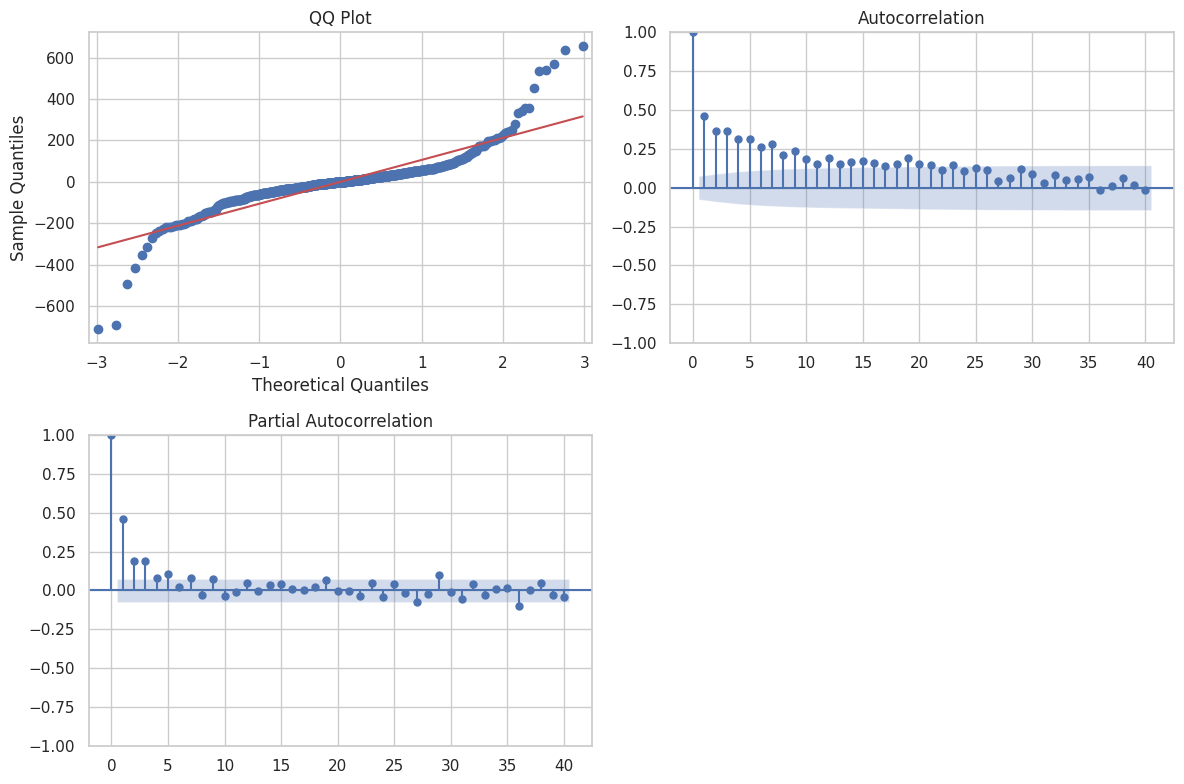

In [ ]:

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar el archivo CSV
datos_vivienda = pd.read_csv("regresion_bien.csv")

# Limpiar el DataFrame eliminando columnas no deseadas
columnas_a_eliminar = []
datos_vivienda2 = datos_vivienda.drop(columns=columnas_a_eliminar)

# Crear un modelo de regresión lineal múltiple
modelo_regresion = smf.ols(formula="precio ~ mt2 + ubicacion + estrato + alcobas + banos + balcon + parqueadero + administracion + avaluo + terminado", data=datos_vivienda2).fit()

# Mostrar un resumen del modelo
print(modelo_regresion.summary())

# Realizar el test de independencia Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
print("Durbin-Watson:", durbin_watson(modelo_regresion.resid))

# Realizar el test de homocedasticidad Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan
_, p_value_bp, _, _ = het_breuschpagan(modelo_regresion.resid, modelo_regresion.model.exog)
print("Breusch-Pagan p-value:", p_value_bp)

# Realizar el test de normalidad Shapiro-Wilk
from scipy.stats import shapiro
shapiro_test = shapiro(modelo_regresion.resid)
print("Shapiro-Wilk p-value:", shapiro_test[1])

# Plotear los gráficos de diagnóstico
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sm.graphics.qqplot(modelo_regresion.resid, line='s', ax=axes[0, 0])
axes[0, 0].set_title('QQ Plot')
sm.graphics.tsa.plot_acf(modelo_regresion.resid, lags=40, ax=axes[0, 1])
axes[0, 1].set_title('Autocorrelation')
sm.graphics.tsa.plot_pacf(modelo_regresion.resid, lags=40, ax=axes[1, 0])
axes[1, 0].set_title('Partial Autocorrelation')
axes[1, 1].remove()
plt.tight_layout()

# Calcular el VIF para comprobar la multicolinealidad
X = datos_vivienda2.drop(columns=["precio"])
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# Realizar la regresión con transformación logarítmica en la variable dependiente
modelo_regresion_log = smf.ols(formula="np.log(precio) ~ mt2 + ubicacion + estrato + alcobas + banos + balcon + administracion + avaluo", data=datos_vivienda2).fit()
print(modelo_regresion_log.summary())

# Realizar el test de independencia Durbin-Watson para el modelo logarítmico
print("Durbin-Watson:", durbin_watson(modelo_regresion_log.resid))

# Realizar el test de homocedasticidad Breusch-Pagan para el modelo logarítmico
_, p_value_bp_log, _, _ = het_breuschpagan(modelo_regresion_log.resid, modelo_regresion_log.model.exog)
print("Breusch-Pagan p-value:", p_value_bp_log)

# Realizar el test de normalidad Shapiro-Wilk para el modelo logarítmico
shapiro_test_log = shapiro(modelo_regresion_log.resid)
print("Shapiro-Wilk p-value:", shapiro_test_log[1])

# Plotear los gráficos de diagnóstico para el modelo logarítmico
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sm.graphics.qqplot(modelo_regresion_log.resid, line='s', ax=axes[0, 0])
axes[0, 0].set_title('QQ Plot (Log)')
sm.graphics.tsa.plot_acf(modelo_regresion_log.resid, lags=40, ax=axes[0, 1])
axes[0, 1].set_title('Autocorrelation (Log)')
sm.graphics.tsa.plot_pacf(modelo_regresion_log.resid, lags=40, ax=axes[1, 0])
axes[1, 0].set_title('Partial Autocorrelation (Log)')
axes[1, 1].remove()
plt.tight_layout()


In [ ]:
datos_vivienda

,id,precio,mt2,ubicacion,estrato,alcobas,banos,balcon,parqueadero,administracion,avaluo,terminado
0,1,79.0,43.16,norte,3,3,1,si,si,0.050,14.923002,no
1,2,93.0,56.92,norte,2,2,1,si,si,0.069,27.000000,si
2,3,100.0,66.40,norte,3,2,2,no,no,0.000,15.738427,no
3,4,123.0,61.85,norte,2,3,2,si,si,0.130,27.000000,no
4,5,135.0,89.80,norte,4,3,2,si,no,0.000,39.567000,si
...,...,...,...,...,...,...,...,...,...,...,...,...
689,690,498.0,180.00,laureles,5,4,3,si,si,0.570,233.784000,si
690,691,508.0,209.00,laureles,6,4,3,si,si,0.450,258.850000,si
691,692,550.0,149.00,laureles,6,3,4,no,si,0.747,326.157000,si
692,693,630.0,179.00,laureles,5,3,3,si,si,0.340,324.114000,si


Aquí tienes la información organizada en una tabla:

| Prueba                                | Estadístico     | Grados de Libertad (df) | Valor p (p-value)    |
|---------------------------------------|-----------------|--------------------------|-----------------------|
| COLINEALIDAD - Variable 'banos'       | GVIF = 3.487     | Df = 6                   | GVIF^(1/(2*Df)) = 1.1097 |
| COLINEALIDAD - Variable 'habitaciones' | GVIF = 3.017     | Df = 4                   | GVIF^(1/(2*Df)) = 1.1480 |
| COLINEALIDAD - Variable 'metros_cuadrados' | GVIF = 3.384   | Df = 1                   | GVIF^(1/(2*Df)) = 1.8396 |
| TEST DE INDEPENDENCIA DURBIN-WATSON   | DW = 1.4372     | -                        | p-value < 2.2e-16     |
| TEST DE HOMOCEDASTICIDAD BREUSCH-PAGAN | BP = 412.52     | df = 11                  | p-value < 2.2e-16     |
| TEST DE AJUSTE GAMMA                  | W = 0.82976     | -                        | p-value < 2.2e-16     |

Esta tabla resume los resultados de las pruebas de colinealidad (VIF), independencia (Durbin-Watson), homocedasticidad (Breusch-Pagan) y normalidad (Shapiro-Wilk) realizadas en el modelo de regresión logarítmica (modelo_glm).